# Fruits fresh and rotten for classification

1. introducci贸

Utiltzare la llibreria Keras de tensorflow per el tractament de les dades ja que tinc carpetes amb imatges girades en comptes de un csv com estaba habituat. He treballat amb aquesta llibreria a la assignatura de visio per computador l'any passat y pel que he vist Tensorflow no esta Suportat en la versi贸 de python 3.11 per lo que he tingut que pasar a 3.10 per si voleu executar el codi vosaltres.

In [4]:
import sys
sys.path.insert(0,'C:\\Users\\moasi\\Downloads\\kaggle')
from src import librerias
from src import funcionshow

TRAIN_PATH='../data/dataset/train/'
BATCH_SIZE=64
IMG_SHAPE=(240,240)

In [5]:
labels,imlabels,imnames,numim,numlab=librerias.crear_labels(TRAIN_PATH)

#data augmentation
train=librerias.ImageDataGenerator(rescale=1./255, validation_split = 0.1)
test=librerias.ImageDataGenerator(rescale=1/255.0)

In [6]:
train_dataset = train.flow_from_directory(batch_size=BATCH_SIZE,directory=TRAIN_PATH,shuffle=True,classes=labels,target_size=IMG_SHAPE, subset="training",class_mode='categorical')
val_dataset = train.flow_from_directory(batch_size=BATCH_SIZE,directory=TRAIN_PATH,shuffle=True,classes=labels,target_size=IMG_SHAPE, subset="validation",class_mode='categorical')

Found 9813 images belonging to 6 classes.
Found 1088 images belonging to 6 classes.


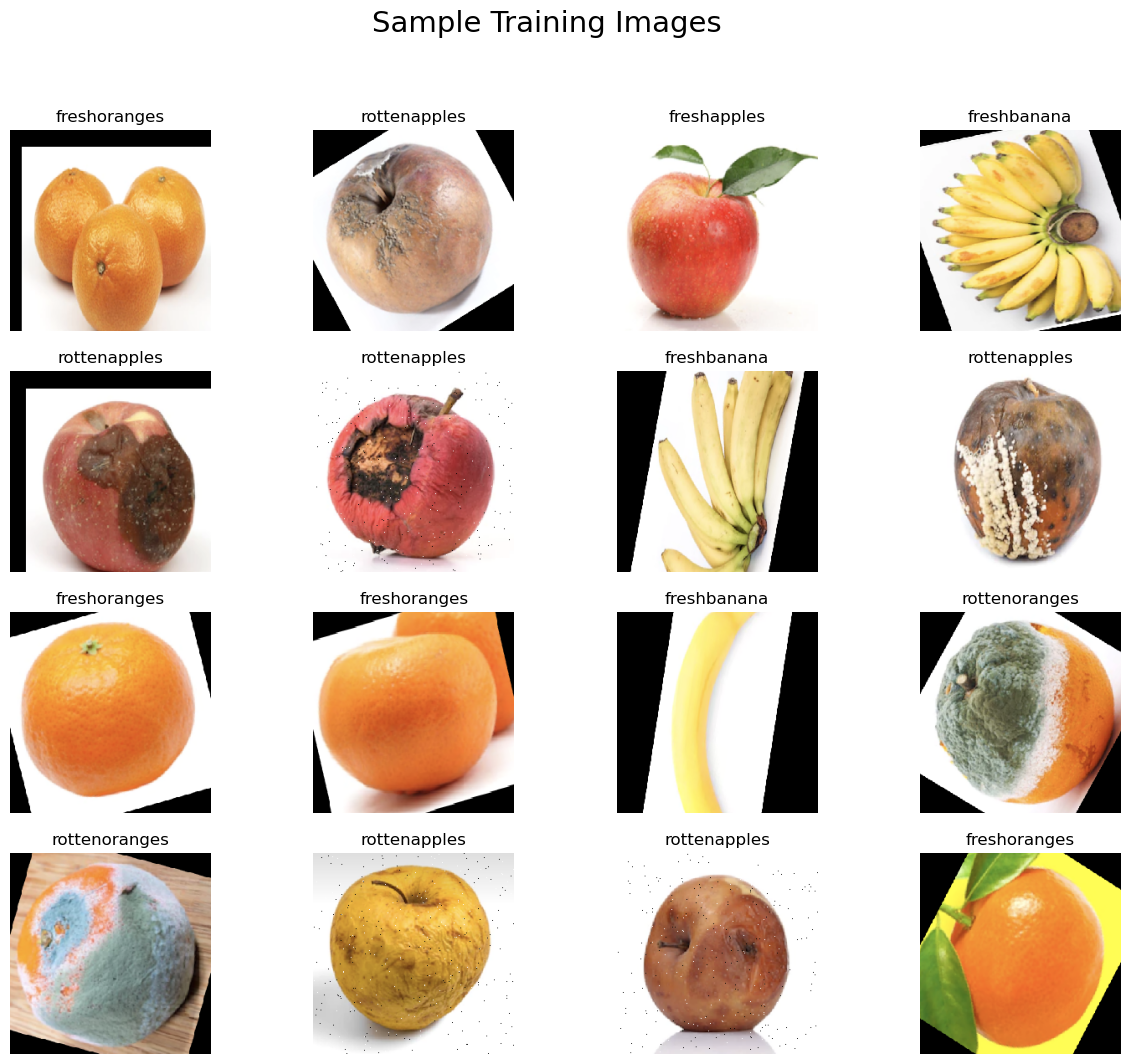

In [7]:
funcionshow.imprimirimg(train_dataset,labels,4,4)

Un cop hem llegit les dades veiem que en train_dataset[X][0] tenim els valors de les imatges per tal de ser impresas amb plt, en train_dataset[X][1] un array que ens indica a quina clase / carpeta pertany la fruita en questi贸 provare les dades amb la carpeta test per tal de prevenir un cas de overflow ja que hi ha 10000 imatges en train y 2500 nomes en test. La variable X arriba fins al valor de dividir el numero de imatges/BATCH_SIZE en la funci贸 ImageDataGenerator que ens realitza un Data augmentation a les meves dades.

Les diferents variables que tenim son la categoria a la que pertany la nostre imatge que sera 1 si pertany i si no pertany en aquella columna hi haura un valor 0, el nostre objectius es detectar si una fruita esta en bones condicions o no per molt que hi hagi una foto amb la fruita girada o no.